In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
def add_family_tree(graph, parent, generation, max_generation, order, reverse=False):
    if generation > max_generation:
        return order

    children = df[df['Parent'] == parent]['Child'].tolist()
    if reverse and generation <= 2:
        children.reverse()

    for child in children:
        graph.add_edge(parent, child)
        order = add_family_tree(graph, child, generation + 1, max_generation, order, reverse)

    graph.nodes[parent]['generation'] = generation
    graph.nodes[parent]['order'] = order
    return order + 1

In [5]:
df = pd.read_csv('Family.csv')


In [6]:
max_generation = df['Generation'].max()


In [7]:
family_tree = nx.DiGraph()


In [8]:
root_node = 'Root'
family_tree.add_node(root_node)

In [9]:
add_family_tree(family_tree, root_node, 1, max_generation, 1, True)


8

In [10]:
positions = {}
for node in family_tree.nodes:
    positions[node] = (family_tree.nodes[node].get('generation', 0), -family_tree.nodes[node].get('order', 0))

(-0.31500000000000006, 3.315, -7.734999999999999, 0.7350000000000001)

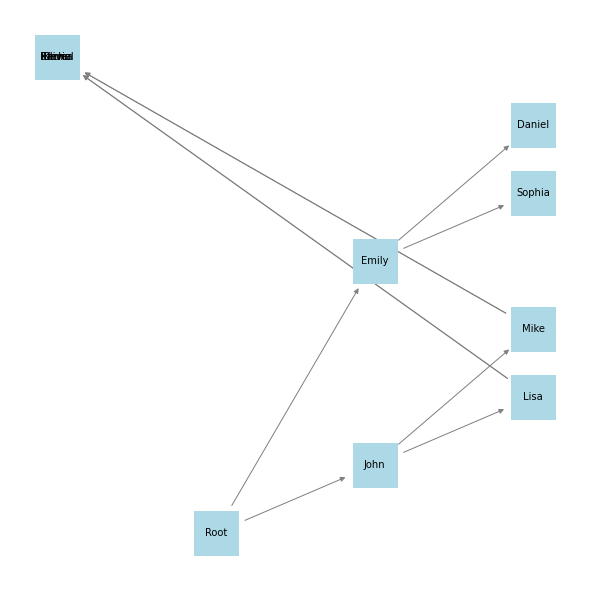

In [11]:
plt.figure(figsize=(8, 8))
nx.draw(family_tree, pos=positions, with_labels=True, node_size=2000, font_size=10, node_shape='s', node_color='lightblue', edge_color='gray')
plt.axis('off')
